In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import mannwhitneyu
from statsmodels.stats.diagnostic import normal_ad
from scipy.stats import shapiro

In [7]:
df=pd.read_csv('salaries.csv')

Esta variable es de tipo ratio por lo cual antes de ir directamente a pruebas no paramétricas debemos verificar normalidad de los residuos porque si esto se cumple podemos usar pruebas paramétricas. En el ejemplo anterior no porque teníamos que la variable dependiente era ordinal.

In [8]:
df.head()

,Salary,Position
0,57727.0,2.0
1,39907.0,1.0
2,46659.0,2.0
3,40233.0,1.0
4,42198.0,1.0


In [9]:
group1=df[df.Position==1.0]
group2=df[df.Position==2.0]
group1.head()

,Salary,Position
1,39907.0,1.0
3,40233.0,1.0
4,42198.0,1.0
6,40324.0,1.0
8,36792.0,1.0


In [10]:
mean1=group1.Salary.mean() 
mean2=group2.Salary.mean() 
res1=group1.Salary - mean1
res2=group2.Salary - mean2

------------------Sales------------------ 

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 0.044334003125444804
Residuals are not normally distributed 

Using the Shapiro-Wilks test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 0.04937711853378593
Residuals are not normally distributed


/tmp/ipykernel_959/1423692679.py:31: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res1)


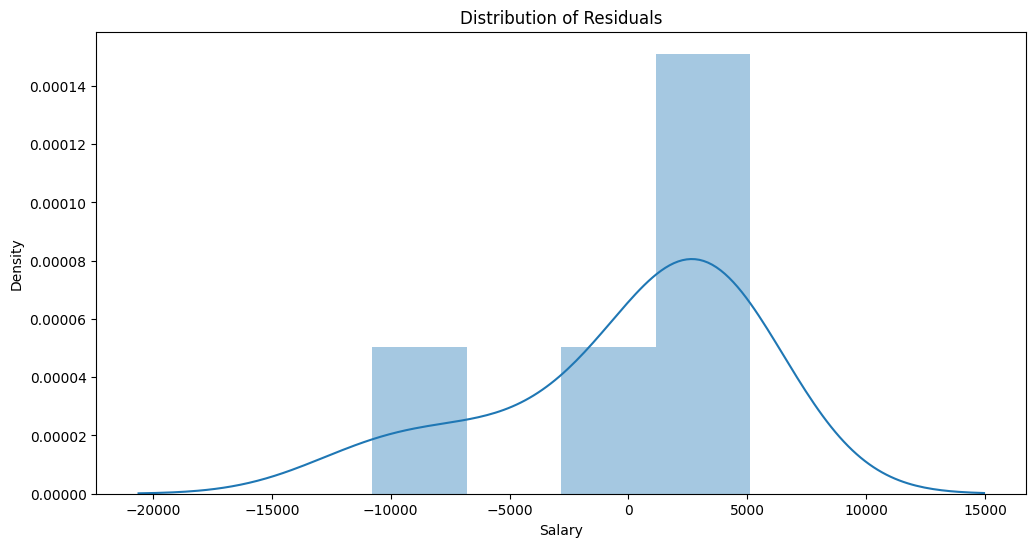


Assumption not satisfied

Confidence intervals will likely be affected
Try performing nonlinear transformations on variables 

------------------Manager------------------ 

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 0.6866418530842298
Residuals are normally distributed 

Using the Shapiro-Wilks test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 0.5692867708962959
Residuals are normally distributed


/tmp/ipykernel_959/1423692679.py:74: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res2)


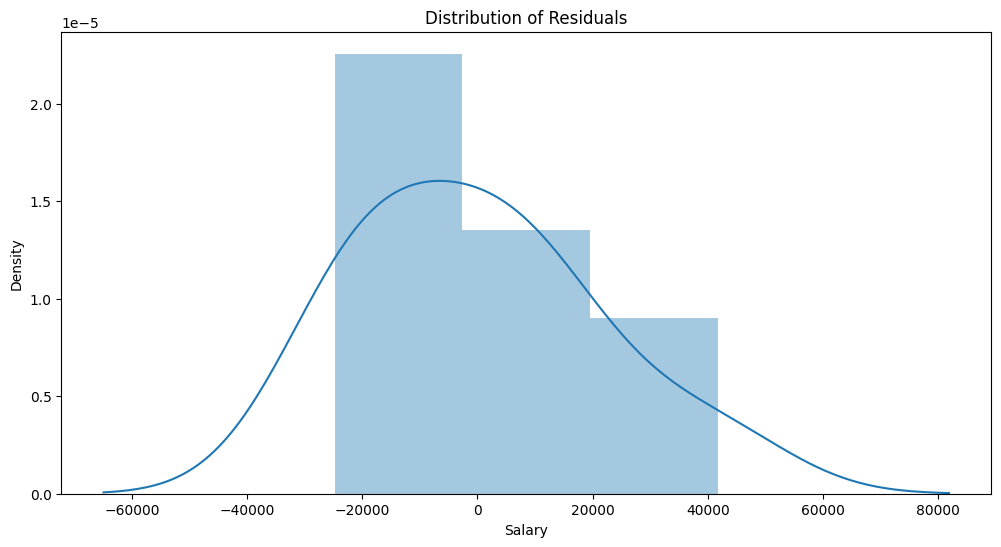


Assumption satisfied


In [11]:
# Performing the test on the residuals
p_value_thresh=0.05
print('------------------Sales------------------','\n')
     
print('Using the Anderson-Darling test for normal distribution')
        
p_value = normal_ad(res1)[1]
print('p-value from the test - below 0.05 generally means non-normal:', p_value)
    
# Reporting the normality of the residuals
if p_value < p_value_thresh:
  print('Residuals are not normally distributed', '\n')
else:
  print('Residuals are normally distributed', '\n')
    
print('Using the Shapiro-Wilks test for normal distribution')
shapiro_test = shapiro(res1)
shapiro_test_stat=shapiro_test[0]
shapiro_test_pvalue=shapiro_test[1]
print('p-value from the test - below 0.05 generally means non-normal:', shapiro_test_pvalue)
    
# Reporting the normality of the residuals
if shapiro_test_pvalue < p_value_thresh:
  print('Residuals are not normally distributed')
else:
  print('Residuals are normally distributed')

# Plotting the residuals distribution
plt.subplots(figsize=(12, 6))
plt.title('Distribution of Residuals')
sns.distplot(res1)
plt.show()
    
print()
if p_value > p_value_thresh:
  print('Assumption satisfied', '\n')
else:
  print('Assumption not satisfied')
  print()
  print('Confidence intervals will likely be affected')
  print('Try performing nonlinear transformations on variables', '\n')

#################################################################################################
# Performing the test on the residuals
p_value_thresh=0.05
print('------------------Manager------------------','\n')
     
print('Using the Anderson-Darling test for normal distribution')
        
p_value = normal_ad(res2)[1]
print('p-value from the test - below 0.05 generally means non-normal:', p_value)
    
# Reporting the normality of the residuals
if p_value < p_value_thresh:
  print('Residuals are not normally distributed', '\n')
else:
  print('Residuals are normally distributed', '\n')
    
print('Using the Shapiro-Wilks test for normal distribution')
shapiro_test = stats.shapiro(res2)
shapiro_test_stat=shapiro_test[0]
shapiro_test_pvalue=shapiro_test[1]
print('p-value from the test - below 0.05 generally means non-normal:', shapiro_test_pvalue)
    
# Reporting the normality of the residuals
if shapiro_test_pvalue < p_value_thresh:
  print('Residuals are not normally distributed')
else:
  print('Residuals are normally distributed')

# Plotting the residuals distribution
plt.subplots(figsize=(12, 6))
plt.title('Distribution of Residuals')
sns.distplot(res2)
plt.show()
    
print()
if p_value > p_value_thresh:
  print('Assumption satisfied')
else:
  print('Assumption not satisfied')
  print()
  print('Confidence intervals will likely be affected')
  print('Try performing nonlinear transformations on variables')

In [12]:
stat, p = mannwhitneyu(group1.Salary, group2.Salary,alternative='less')
print('p-value:', p)

p-value: 0.0014136360455584039


p-valor < 0.05 entonces hay una diferencia significativa entre los sueldos del personal de Ventas y de los Gerentes, es decir, los Gerentes tienen un sueldo significativamente mayor que el personal de Ventas.